In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mydata.csv')
df.head()

,loan_status,annual_inc,delinq_2yrs,dti,emp_length,int_rate,revol_bal,total_acc,funded_amnt,total_pymnt,...,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months
0,1.0,-0.178115,-0.308854,0.272878,10.0,0.1596,0.037014,-0.798600,0.843664,0.574126,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,-0.211231,-0.308854,-1.048249,5.0,0.1629,-0.096776,-0.269427,0.147022,0.150574,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-0.538062,-0.308854,0.402605,10.0,0.1059,-0.580973,-0.004841,-0.819958,-0.689235,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.121840,-0.308854,0.028336,10.0,0.1756,0.936541,0.788918,1.848768,2.730410,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.821737,1.702600,0.252003,1.0,0.1483,1.563480,0.083355,1.952745,2.118599,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# droping the categorical variables which are home_ownership, grade, term
df.drop(['home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'term_ 36 months', 'term_ 60 months'], axis=1, inplace=True)
df

,loan_status,annual_inc,delinq_2yrs,dti,emp_length,int_rate,revol_bal,total_acc,funded_amnt,total_pymnt
0,1.0,-0.178115,-0.308854,0.272878,10.0,0.1596,0.037014,-0.798600,0.843664,0.574126
1,1.0,-0.211231,-0.308854,-1.048249,5.0,0.1629,-0.096776,-0.269427,0.147022,0.150574
2,1.0,-0.538062,-0.308854,0.402605,10.0,0.1059,-0.580973,-0.004841,-0.819958,-0.689235
3,1.0,0.121840,-0.308854,0.028336,10.0,0.1756,0.936541,0.788918,1.848768,2.730410
4,1.0,0.821737,1.702600,0.252003,1.0,0.1483,1.563480,0.083355,1.952745,2.118599
...,...,...,...,...,...,...,...,...,...,...
5661,1.0,-0.538062,-0.308854,1.246576,4.0,0.1008,-0.842667,-1.504164,-0.819958,-0.693074
5662,1.0,-0.578056,-0.308854,0.411552,1.0,0.0790,-0.442926,-0.798600,-0.847685,-0.739693
5663,1.0,1.541631,-0.308854,0.870815,2.0,0.1714,-0.188557,2.111850,3.339096,3.222752
5664,1.0,-0.580056,-0.308854,1.726715,3.0,0.1149,-0.292420,-0.710405,-0.681323,-0.548788


In [4]:
import seaborn as sns
from scipy import stats
cormat = df.corr()
round(cormat, 2)

,loan_status,annual_inc,delinq_2yrs,dti,emp_length,int_rate,revol_bal,total_acc,funded_amnt,total_pymnt
loan_status,1.00,0.05,-0.02,-0.04,-0.00,-0.23,-0.01,0.04,-0.04,0.24
annual_inc,0.05,1.00,0.04,-0.15,0.13,0.05,0.34,0.29,0.35,0.33
delinq_2yrs,-0.02,0.04,1.00,-0.03,0.02,0.17,-0.06,0.06,-0.03,-0.02
dti,-0.04,-0.15,-0.03,1.00,0.06,0.09,0.24,0.23,0.05,0.05
emp_length,-0.00,0.13,0.02,0.06,1.00,-0.00,0.15,0.19,0.14,0.13
int_rate,-0.23,0.05,0.17,0.09,-0.00,1.00,0.09,-0.05,0.30,0.29
revol_bal,-0.01,0.34,-0.06,0.24,0.15,0.09,1.00,0.30,0.29,0.28
total_acc,0.04,0.29,0.06,0.23,0.19,-0.05,0.30,1.00,0.25,0.23
funded_amnt,-0.04,0.35,-0.03,0.05,0.14,0.30,0.29,0.25,1.00,0.91
total_pymnt,0.24,0.33,-0.02,0.05,0.13,0.29,0.28,0.23,0.91,1.00


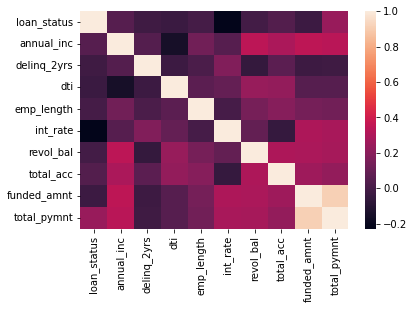

In [5]:
sns.heatmap(cormat);